---
###  影片轉換圖片

In [ ]:
import cv2
import os
from datetime import datetime, timedelta

base_dir = "/home/kirito/USED/my1106.1"
input_dir = f"{base_dir}/camera"
output_dir = f"{base_dir}/Real_data33"
datatype='mp4'
os.makedirs(output_dir, exist_ok=True)

video_path = input_dir + '/output.'+datatype
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"❌ 無法開啟影片檔案")
    exit(1)

fps = cap.get(cv2.CAP_PROP_FPS)

if fps == 0:
    print(f"⚠️  無法讀取 FPS，使用預設值 30")
    fps = 30

sample_rate = 8  # 每秒張數

duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / fps
print(f"影片長度: {duration:.2f}秒, FPS: {fps}")

def get_video_start_time():
    
    while True:
        time_input = input("起始時間,ex:18:55:55").strip()
        
        try:
            time_obj = datetime.strptime(time_input, "%H:%M:%S").time()
            dt = datetime.combine(datetime.today(), time_obj)
            return dt
        except ValueError:
            print("❌ 格式錯誤，請重新輸入")

# 取得影片開始時間
start_time = get_video_start_time()
print(f"\n 影片開始時間: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

# 確認是否正確
confirm = input(f"是否正確? (y/n): ").strip().lower()
if confirm != 'y':
    print("請重新執行程式並輸入正確時間")
    cap.release()
    exit(0)


idx = 0
success = True

print(f" 擷取圖片 ")

for sec in range(int(duration)):
    current_time = start_time + timedelta(seconds=sec)
    minute = current_time.minute
    second = current_time.second
    
    for s in range(sample_rate):
        timestamp = sec + s / sample_rate
        cap.set(cv2.CAP_PROP_POS_MSEC, timestamp * 1000)
        success, frame = cap.read()
        if not success:
            break
        
        filename = f'{output_dir}/_{idx+1:03d}_{minute:02d}_{second:02d}_{s+1}.png'
        cv2.imwrite(filename, frame)
        idx += 1
    
    # 每處理 10 秒顯示一次進度
    if sec % 10 == 0 and sec > 0:
        progress = sec / int(duration) * 100
        print(f"   處理進度: {sec}/{int(duration)} 秒 ({progress:.1f}%)")

cap.release()

print(f"\n✅ 共儲存 {idx} 張圖片")
print(f"📂 輸出目錄: {output_dir}")

# 顯示範例檔名
if idx > 0:
    example_files = sorted(os.listdir(output_dir))[:3]
    print(f"\n📝 範例檔名:")
    for f in example_files:
        print(f"   {f}")

影片長度: 391.73秒, FPS: 29.997761208698833

🕐 影片開始時間: 2025-11-17 18:55:55

🎬 開始擷取圖片...
   處理進度: 10/391 秒 (2.6%)


KeyboardInterrupt: 

---
### 熱成像轉圖片

[讀檔完成] 檔案數: 3, 幀數: 2618, 秒數筆數: 2618, 跳過異常行: 0
已儲存第 1/2618 張圖片
已儲存第 2/2618 張圖片
已儲存第 3/2618 張圖片
已儲存第 4/2618 張圖片
已儲存第 5/2618 張圖片
已儲存第 6/2618 張圖片
已儲存第 7/2618 張圖片
已儲存第 8/2618 張圖片
已儲存第 9/2618 張圖片
已儲存第 10/2618 張圖片
已儲存第 11/2618 張圖片
已儲存第 12/2618 張圖片
已儲存第 13/2618 張圖片
已儲存第 14/2618 張圖片
已儲存第 15/2618 張圖片
已儲存第 16/2618 張圖片
已儲存第 17/2618 張圖片
已儲存第 18/2618 張圖片
已儲存第 19/2618 張圖片
已儲存第 20/2618 張圖片
已儲存第 21/2618 張圖片
已儲存第 22/2618 張圖片
已儲存第 23/2618 張圖片
已儲存第 24/2618 張圖片
已儲存第 25/2618 張圖片
已儲存第 26/2618 張圖片
已儲存第 27/2618 張圖片
已儲存第 28/2618 張圖片
已儲存第 29/2618 張圖片
已儲存第 30/2618 張圖片
已儲存第 31/2618 張圖片
已儲存第 32/2618 張圖片
已儲存第 33/2618 張圖片
已儲存第 34/2618 張圖片
已儲存第 35/2618 張圖片
已儲存第 36/2618 張圖片
已儲存第 37/2618 張圖片
已儲存第 38/2618 張圖片
已儲存第 39/2618 張圖片
已儲存第 40/2618 張圖片
已儲存第 41/2618 張圖片
已儲存第 42/2618 張圖片
已儲存第 43/2618 張圖片
已儲存第 44/2618 張圖片
已儲存第 45/2618 張圖片
已儲存第 46/2618 張圖片
已儲存第 47/2618 張圖片
已儲存第 48/2618 張圖片
已儲存第 49/2618 張圖片
已儲存第 50/2618 張圖片
已儲存第 51/2618 張圖片
已儲存第 52/2618 張圖片
已儲存第 53/2618 張圖片
已儲存第 54/2618 張圖片
已儲存第 55/2618 張圖片
已儲存第 56/2618 張圖片
已儲存第 57/261

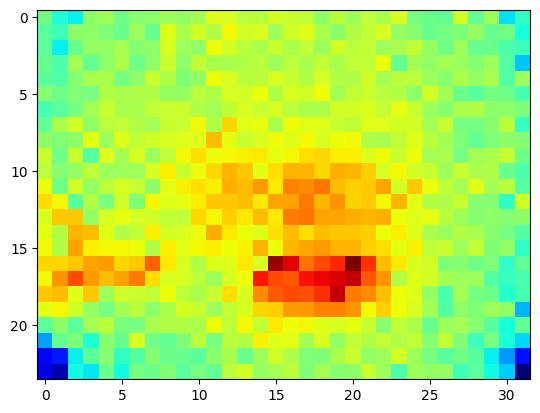

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import re

fig, ax1 = plt.subplots()
matrix = []
array = []

# 建立圖片儲存資料夾（如不存在）
output_dir = f"{base_dir}/Thermal_data"
os.makedirs(output_dir, exist_ok=True)

t = []            # 把每幀用來比較的時間字元存起來
same_count = 1    # 同秒連號計數

# 你的原本變數
matrix = []
t = [] # 存每幀的「秒」
mins = [] # 存每幀的「分」
# 使用絕對路徑，避免工作目錄影響
ther_dir = base_dir + "/thermal"  # 熱成像資料夾
# 取得資料夾內所有 log 檔，依 log 編號排序（log000 → log001 → …）
all_files = [f for f in os.listdir(ther_dir) if f.lower().startswith("log") and f.lower().endswith(".txt")]

def _log_key(name: str):
    # 從檔名抓出連續數字做排序 key；抓不到就給 0
    m = re.search(r'(\d+)', name)
    return int(m.group(1)) if m else 0

all_files.sort(key=_log_key)

skipped = 0  # 統計有問題而被跳過的行
for fname in all_files:
    path = os.path.join(ther_dir, fname)
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            try:
                obj = json.loads(line)
            except json.JSONDecodeError:
                skipped += 1
                continue

            time_val = obj.get("time")
            msg = obj.get("message")
            # time 必須是 list/tuple 且有秒（index 5）；message 需存在
            if not (isinstance(time_val, (list, tuple)) and len(time_val) > 5 and isinstance(msg, (list, tuple))):
                skipped += 1
                continue

            data = np.asarray(msg, dtype=np.float32)
            data = data / 255.0 * (35.5 - 10.0) + 10.0
            
            frame = np.array_split(data, 24)
            frame = np.asarray(frame)
            frame = np.fliplr(frame)  

            matrix.append(frame)
            t.append(int(time_val[5]))  # 取「秒」
            mins.append(int(time_val[4]))  # 取「分」數字

print(f"[讀檔完成] 檔案數: {len(all_files)}, 幀數: {len(matrix)}, 秒數筆數: {len(t)}, 跳過異常行: {skipped}")

# 先對齊長度
min_len = min(len(matrix), len(t), len(mins))
matrix = matrix[:min_len]
t = t[:min_len]
mins = mins[:min_len]

# 直接用迴圈產生圖片，不使用動畫
same_count = 0
for i in range(len(matrix)):
    ax1.clear()
    ax1.imshow(matrix[i], cmap='jet')

    if i == 0 or t[i] != t[i-1]:
        same_count = 1
    else:
        same_count += 1

    plt.savefig(f'{output_dir}/_{i+1:03d}_{mins[i]}_{t[i]}_{same_count}.png')
    print(f"已儲存第 {i+1}/{len(matrix)} 張圖片")

print("所有圖片儲存完成！")



---
###  熱成像與影像配對

In [ ]:
import re
import cv2
import numpy as np
from pathlib import Path
from typing import Dict, List, Tuple, Optional
from collections import defaultdict
import shutil

class ImageMatcher:
   #初始化
    def __init__(self, rgb_dir: Path, thermal_dir: Path, output_dir: Path):
       
        self.rgb_dir = Path(rgb_dir)
        self.thermal_dir = Path(thermal_dir)
        self.output_dir = Path(output_dir)
        
        # 建立輸出目錄
        self.output_rgb_dir = self.output_dir / "matched_rgb"
        self.output_thermal_dir = self.output_dir / "matched_thermal"
        self.output_rgb_dir.mkdir(parents=True, exist_ok=True)
        self.output_thermal_dir.mkdir(parents=True, exist_ok=True)
        
    def parse_filename(self, filename: str) -> Optional[Dict]:
        
        # 移除副檔名
        name_without_ext = Path(filename).stem
        
        # 嘗試匹配格式: _序號_分鐘_秒_幀數
        pattern = r'^_(\d+)_(\d+)_(\d+)_\s*(\d+)$'
        match = re.match(pattern, name_without_ext)
        
        if not match:
            return None
        
        sequence = int(match.group(1))
        minute = int(match.group(2))
        second = int(match.group(3))
        frame_in_second = int(match.group(4))
        
        # 計算該幀的總秒數（假設從 0 小時開始）
        total_seconds = minute * 60 + second
        
        return {
            'filename': filename,
            'sequence': sequence,
            'minute': minute,
            'second': second,
            'total_seconds': total_seconds,
            'frame_in_second': frame_in_second
        }
    
    def load_images(self, directory: Path) -> Dict[int, List[Dict]]:
      
        images_by_second = defaultdict(list)
        
        # 取得所有 PNG 檔案
        image_files = sorted(directory.glob("*.png"))
        
        print(f"   找到 {len(image_files)} 個圖片檔案")
        
        parsed_count = 0
        for image_file in image_files:
            parsed = self.parse_filename(image_file.name)
            if parsed:
                images_by_second[parsed['total_seconds']].append(parsed)
                parsed_count += 1
        
        print(f"   成功解析 {parsed_count} 個檔案")
        
        # 對每秒內的圖片按幀數排序
        for second in images_by_second:
            images_by_second[second].sort(key=lambda x: x['frame_in_second'])
        
        return dict(images_by_second)
    
    #尋找開始時間
    def find_start_second(
        self, 
        rgb_images: Dict[int, List[Dict]], 
        thermal_images: Dict[int, List[Dict]]
    ) -> Tuple[int, int]:
       
        rgb_start = min(rgb_images.keys()) if rgb_images else 0
        thermal_start = min(thermal_images.keys()) if thermal_images else 0
        
        return rgb_start, thermal_start
    
    def match_images(self) -> List[Tuple]:
        
        print("\n 載入 RGB 圖片")
        rgb_images = self.load_images(self.rgb_dir)
        
        print("\n 載入熱成像圖片")
        thermal_images = self.load_images(self.thermal_dir)
        
        if not rgb_images or not thermal_images:
            print("\n  RGB 或熱成像圖片資料為空")
            return []
        
  
        rgb_start, thermal_start = self.find_start_second(rgb_images, thermal_images)
        
        print(f" RGB 起始時間: {rgb_start//60:02d}:{rgb_start%60:02d}")
        print(f" 熱成像起始時間: {thermal_start//60:02d}:{thermal_start%60:02d}")
        
 
        time_diff = thermal_start - rgb_start
        
        if time_diff > 0:
            print(f" 熱成像早 {time_diff} 秒開始")
            print(f" 跳過 RGB 前 {time_diff} 秒的資料")
        elif time_diff < 0:
            print(f" RGB 早 {-time_diff} 秒開始")
            print(f" 跳過熱成像前 {-time_diff} 秒的資料")
        else:
            print(f" RGB 和熱成像同時開始")
        
       
        
        all_pairs = []  # 所有配對
        
        start_second = max(rgb_start, thermal_start)
        end_second = min(max(rgb_images.keys()), max(thermal_images.keys()))
        
        print(f"   配對時間範圍: {start_second//60:02d}:{start_second%60:02d} ~ "
              f"{end_second//60:02d}:{end_second%60:02d}")
        
        is_first_second = True
        total_matched = 0
        
        for second in range(start_second, end_second + 1):
            # 檢查該秒是否有資料
            if second not in rgb_images or second not in thermal_images:
                continue
            
            rgb_frames = rgb_images[second]
            thermal_frames = thermal_images[second]
            
            # 處理第一秒的特殊情況
            if is_first_second and len(thermal_frames) < 8:
                thermal_count = len(thermal_frames)
                
                print(f"\n 第一秒特殊處理:")
                print(f"      熱成像只有 {thermal_count} 幀")
                print(f"      將從 RGB 該秒的後 {thermal_count} 幀開始配對")
                
                # 從 RGB 的後面幾幀開始配對
                rgb_start_idx = len(rgb_frames) - thermal_count
                if rgb_start_idx < 0:
                    rgb_start_idx = 0
                
                match_count = min(thermal_count, len(rgb_frames) - rgb_start_idx)
                
                # 配對所有幀
                for i in range(match_count):
                    rgb_frame = rgb_frames[rgb_start_idx + i]
                    thermal_frame = thermal_frames[i]
                    all_pairs.append((rgb_frame, thermal_frame, second))
                    total_matched += 1
                
                print(f"      該秒配對 {match_count} 對")
                
                is_first_second = False
                continue
            
            # 一般情況：以幀數少的為上限，配對所有幀
            is_first_second = False
            
            match_count = min(len(rgb_frames), len(thermal_frames))
            
            # 配對該秒的所有幀
            for i in range(match_count):
                rgb_frame = rgb_frames[i]
                thermal_frame = thermal_frames[i]
                all_pairs.append((rgb_frame, thermal_frame, second))
                total_matched += 1
        
        print(f"\n   ✅ 配對完成")
        print(f"      總秒數: {end_second - start_second + 1}")
        print(f"      總配對數: {total_matched}")
        
        return all_pairs
    
    def save_all_pairs(self, all_pairs: List[Tuple]):
        """
        儲存所有配對結果
        
        Args:
            all_pairs: 配對列表（所有配對）
        """
        print(f"\n💾 儲存配對結果...")
        
        # 生成配對清單
        mapping_file = self.output_dir / "matched_pairs_all_frames.txt"
        
        with open(mapping_file, 'w', encoding='utf-8') as f:
            f.write("配對序號\t時間\tRGB 檔名\t熱成像檔名\n")
            f.write("="*100 + "\n")
            
            for idx, (rgb_frame, thermal_frame, second) in enumerate(all_pairs, 1):
                minute = second // 60
                sec = second % 60
                time_str = f"{minute:02d}:{sec:02d}"
                
                f.write(f"{idx}\t{time_str}\t{rgb_frame['filename']}\t{thermal_frame['filename']}\n")
                
                # 複製檔案
                new_rgb_name = f"{idx:04d}_rgb.png"
                new_thermal_name = f"{idx:04d}_thermal.png"
                
                # 複製 RGB
                src_rgb = self.rgb_dir / rgb_frame['filename']
                dst_rgb = self.output_rgb_dir / new_rgb_name
                shutil.copy2(src_rgb, dst_rgb)
                
                # 複製熱成像
                src_thermal = self.thermal_dir / thermal_frame['filename']
                dst_thermal = self.output_thermal_dir / new_thermal_name
                shutil.copy2(src_thermal, dst_thermal)
        
        print(f"   ✅ 配對清單已儲存: {mapping_file}")
        print(f"   ✅ 已複製 {len(all_pairs)} 對圖片")
        print(f"   ✅ RGB 圖片目錄: {self.output_rgb_dir}")
        print(f"   ✅ 熱成像圖片目錄: {self.output_thermal_dir}")


class VideoCreator:
    """影片生成器"""
    
    def __init__(self, rgb_dir: Path, thermal_dir: Path, output_dir: Path):
       
        self.rgb_dir = Path(rgb_dir)
        self.thermal_dir = Path(thermal_dir)
        self.output_dir = Path(output_dir)
    
    def resize_image(self, image: np.ndarray, target_height: int) -> np.ndarray:
        """
        調整圖片大小，保持寬高比
        
        Args:
            image: 輸入圖片
            target_height: 目標高度
        
        Returns:
            調整後的圖片
        """
        h, w = image.shape[:2]
        aspect_ratio = w / h
        target_width = int(target_height * aspect_ratio)
        
        resized = cv2.resize(image, (target_width, target_height))
        return resized
    
    def create_side_by_side_video(
        self, 
        output_filename: str = "combined_video.mp4",
        fps: int = 8,
        target_height: int = 480
    ):
        
        # 取得所有配對的圖片
        rgb_files = sorted(self.rgb_dir.glob("*.png"))
        thermal_files = sorted(self.thermal_dir.glob("*.png"))
        
        if len(rgb_files) != len(thermal_files):
            print(f" 錯誤: RGB 和熱成像圖片數量不一致")
            return
        
        if len(rgb_files) == 0:
            print(f" 錯誤: 沒有找到圖片")
            return
        
        print(f"\n 影片資訊:")
        print(f"   圖片數量: {len(rgb_files)}")
        print(f"   FPS: {fps}")
        print(f"   影片長度: {len(rgb_files) / fps:.2f} 秒")
        print(f"   目標高度: {target_height} 像素")
        
        # 讀取第一組圖片以確定尺寸
        first_rgb = cv2.imread(str(rgb_files[0]))
        first_thermal = cv2.imread(str(thermal_files[0]))
        
        # 調整大小
        first_rgb_resized = self.resize_image(first_rgb, target_height)
        first_thermal_resized = self.resize_image(first_thermal, target_height)
        
        # 計算合併後的尺寸
        gap = 10  # 間隔
        frame_width = first_rgb_resized.shape[1] + first_thermal_resized.shape[1] + gap
        frame_height = target_height
        
        print(f"   RGB 調整後尺寸: {first_rgb_resized.shape[1]} x {first_rgb_resized.shape[0]}")
        print(f"   熱成像調整後尺寸: {first_thermal_resized.shape[1]} x {first_thermal_resized.shape[0]}")
        print(f"   輸出解析度: {frame_width} x {frame_height}")
        
        # 建立影片寫入器
        output_path = self.output_dir / output_filename
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video_writer = cv2.VideoWriter(
            str(output_path),
            fourcc,
            fps,
            (frame_width, frame_height)
        )
        
        if not video_writer.isOpened():
            print(f"❌ 錯誤: 無法建立影片寫入器")
            return
        
        print(f"\n🎬 開始生成影片...")
        
        # 逐張處理圖片
        for idx, (rgb_file, thermal_file) in enumerate(zip(rgb_files, thermal_files), 1):
            # 讀取圖片
            rgb_img = cv2.imread(str(rgb_file))
            thermal_img = cv2.imread(str(thermal_file))
            
            if rgb_img is None or thermal_img is None:
                print(f"   ⚠️  警告: 無法讀取圖片 {idx}")
                continue
            
            # 調整大小
            rgb_resized = self.resize_image(rgb_img, target_height)
            thermal_resized = self.resize_image(thermal_img, target_height)
            
            # 建立合併畫面
            combined = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)
            
            # 放置 RGB（左邊）
            rgb_width = rgb_resized.shape[1]
            combined[:, :rgb_width] = rgb_resized
            
            # 放置熱成像（右邊，加上間隔）
            start_x = rgb_width + gap
            thermal_width = thermal_resized.shape[1]
            
            # 確保不會超出範圍
            end_x = min(start_x + thermal_width, frame_width)
            actual_thermal_width = end_x - start_x
            
            combined[:, start_x:end_x] = thermal_resized[:, :actual_thermal_width]
            
            # 寫入影片
            video_writer.write(combined)
            
            if idx % 50 == 0:
                print(f"   處理進度: {idx}/{len(rgb_files)} ({idx/len(rgb_files)*100:.1f}%)")
        
        video_writer.release()
        
        print(f"\n✅ 影片已生成: {output_path}")
        print(f"   總幀數: {len(rgb_files)}")
        print(f"   影片長度: {len(rgb_files) / fps:.2f} 秒")
    
    def create_separate_videos(
        self,
        rgb_output: str = "rgb_video.mp4",
        thermal_output: str = "thermal_video.mp4",
        fps: int = 8,
        target_height: int = 480
    ):
       
        print(f"生成分離影片")
        
     
        print(f"\n  RGB ")
        self._create_single_video(
            self.rgb_dir,
            self.output_dir / rgb_output,
            fps,
            target_height,
            "RGB"
        )
        
        # 熱成像影片
        print(f"\n  熱成像 ")
        self._create_single_video(
            self.thermal_dir,
            self.output_dir / thermal_output,
            fps,
            target_height,
            "熱成像"
        )
    
    def _create_single_video(
        self,
        image_dir: Path,
        output_path: Path,
        fps: int,
        target_height: int,
        video_type: str
    ):
        
        image_files = sorted(image_dir.glob("*.png"))
        
        if len(image_files) == 0:
            print(f"    沒有找到圖片")
            return
        
        # 讀取第一張圖片以確定尺寸
        first_img = cv2.imread(str(image_files[0]))
        first_resized = self.resize_image(first_img, target_height)
        
        frame_width = first_resized.shape[1]
        frame_height = target_height
        
        print(f"   圖片數量: {len(image_files)}")
        print(f"   輸出解析度: {frame_width} x {frame_height}")
        print(f"   影片長度: {len(image_files) / fps:.2f} 秒")
        
        # 建立影片寫入器
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video_writer = cv2.VideoWriter(
            str(output_path),
            fourcc,
            fps,
            (frame_width, frame_height)
        )
        
        if not video_writer.isOpened():
            print(f"   ❌ 錯誤: 無法建立影片寫入器")
            return
        
        # 逐張處理圖片
        for idx, image_file in enumerate(image_files, 1):
            img = cv2.imread(str(image_file))
            
            if img is None:
                print(f"   ⚠️  警告: 無法讀取圖片 {idx}")
                continue
            
            img_resized = self.resize_image(img, target_height)
            video_writer.write(img_resized)
            
            if idx % 50 == 0:
                print(f"   處理進度: {idx}/{len(image_files)} ({idx/len(image_files)*100:.1f}%)")
        
        video_writer.release()
        
        print(f"   ✅ {video_type}影片已生成: {output_path}")


def main():
    """主程式"""
    
    base_dir = "/home/kirito/USED/my1106.1"  
    
    RGB_DIR = Path(base_dir + "/Real_data2")  # RGB 圖片目錄
    THERMAL_DIR = Path(base_dir + "/Thermal_data")  # 熱成像圖片目錄
    OUTPUT_DIR = Path(base_dir + "/output2")   # 輸出目錄
    
    # 影片參數
    FPS = 8  # 每秒顯示 8 張圖片（即每秒播放 8 幀）
    TARGET_HEIGHT = 480  # 影片高度（像素）
    
    print(f"步驟 1: 配對圖片")
   
    matcher = ImageMatcher(RGB_DIR, THERMAL_DIR, OUTPUT_DIR)
    all_pairs = matcher.match_images()
    
    if not all_pairs:
        print(f"\n❌ 配對失敗")
        return
    
    matcher.save_all_pairs(all_pairs)
    
    print(f"步驟 2: 生成影片")
    
    video_creator = VideoCreator(
        matcher.output_rgb_dir,
        matcher.output_thermal_dir,
        OUTPUT_DIR
    )
    
    # 生成左右並排影片
    video_creator.create_side_by_side_video(
        output_filename="combined_video.mp4",
        fps=FPS,
        target_height=TARGET_HEIGHT
    )
    
    # 生成分離的影片（可選）
    video_creator.create_separate_videos(
        rgb_output="rgb_video.mp4",
        thermal_output="thermal_video.mp4",
        fps=FPS,
        target_height=TARGET_HEIGHT
    )
    print(f"\n 所有步驟完成")
    print(f"   配對清單: {OUTPUT_DIR / 'matched_pairs_all_frames.txt'}")
    print(f"   並排影片: {OUTPUT_DIR / 'combined_video.mp4'}")
    print(f"   RGB 影片: {OUTPUT_DIR / 'rgb_video.mp4'}")
    print(f"   熱成像影片: {OUTPUT_DIR / 'thermal_video.mp4'}")


if __name__ == "__main__":
    main()

步驟 1: 配對圖片


📂 載入 RGB 圖片: /home/kirito/USED/my1106.1/Real_data2
   找到 3128 個圖片檔案
   成功解析 3128 個檔案

📂 載入熱成像圖片: /home/kirito/USED/my1106.1/Thermal_data
   找到 3102 個圖片檔案
   成功解析 3102 個檔案

🕐 時間資訊:
   RGB 起始時間: 23:27
   熱成像起始時間: 23:24
   ⚠️  熱成像比 RGB 早 3 秒開始
   → 將跳過熱成像前 3 秒的資料

🔍 開始配對...
   配對時間範圍: 23:27 ~ 29:57

   ✅ 配對完成
      總秒數: 391
      總配對數: 3033

💾 儲存配對結果...
   ✅ 配對清單已儲存: /home/kirito/USED/my1106.1/output2/matched_pairs_all_frames.txt
   ✅ 已複製 3033 對圖片
   ✅ RGB 圖片目錄: /home/kirito/USED/my1106.1/output2/matched_rgb
   ✅ 熱成像圖片目錄: /home/kirito/USED/my1106.1/output2/matched_thermal
步驟 2: 生成影片

生成左右並排影片

📊 影片資訊:
   圖片數量: 3033
   FPS: 8
   影片長度: 379.12 秒
   目標高度: 480 像素
   RGB 調整後尺寸: 640 x 480
   熱成像調整後尺寸: 640 x 480
   輸出解析度: 1290 x 480

🎬 開始生成影片...
   處理進度: 50/3033 (1.6%)
   處理進度: 100/3033 (3.3%)
   處理進度: 150/3033 (4.9%)
   處理進度: 200/3033 (6.6%)
   處理進度: 250/3033 (8.2%)
   處理進度: 300/3033 (9.9%)
   處理進度: 350/3033 (11.5%)
   處理進度: 400/3033 (13.2%)
   處理進度: 450/3033 (14.8%)
   處理進度: 500/30

   處理進度: 1850/3033 (61.0%)
   處理進度: 1900/3033 (62.6%)
   處理進度: 1950/3033 (64.3%)
   處理進度: 2000/3033 (65.9%)
   處理進度: 2050/3033 (67.6%)
   處理進度: 2100/3033 (69.2%)
   處理進度: 2150/3033 (70.9%)
   處理進度: 2200/3033 (72.5%)
   處理進度: 2250/3033 (74.2%)
   處理進度: 2300/3033 (75.8%)
   處理進度: 2350/3033 (77.5%)
   處理進度: 2400/3033 (79.1%)
   處理進度: 2450/3033 (80.8%)
   處理進度: 2500/3033 (82.4%)
   處理進度: 2550/3033 (84.1%)
   處理進度: 2600/3033 (85.7%)
   處理進度: 2650/3033 (87.4%)
   處理進度: 2700/3033 (89.0%)
   處理進度: 2750/3033 (90.7%)
   處理進度: 2800/3033 (92.3%)
   處理進度: 2850/3033 (94.0%)
   處理進度: 2900/3033 (95.6%)
   處理進度: 2950/3033 (97.3%)
   處理進度: 3000/3033 (98.9%)

✅ 影片已生成: /home/kirito/USED/my1106.1/output2/combined_video.mp4
   總幀數: 3033
   影片長度: 379.12 秒

生成分離影片

📹 生成 RGB 影片...
   圖片數量: 3033
   輸出解析度: 640 x 480
   影片長度: 379.12 秒
   處理進度: 50/3033 (1.6%)
   處理進度: 100/3033 (3.3%)
   處理進度: 150/3033 (4.9%)
   處理進度: 200/3033 (6.6%)
   處理進度: 250/3033 (8.2%)
   處理進度: 300/3033 (9.9%)
   處理進度: 350/3033 (11.5%)
   處理進